1. Import the necessary libraries in Python that will allow you to use data frames, lists, load datasets, and plots.

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

2. Load your dataset into a data frame using the pandas library, then display the first 10 rows of your data.

In [91]:
file_path = 'data/hospital_readmissions.csv'
data = pd.read_csv(file_path)

print(data.head(10))

   Age  Time_in_Hospital  Num_Lab_Procedures  Num_Medications  Num_Outpatient  \
0   71                10                  25                1               9   
1   34                 7                  12                3               8   
2   80                 1                   5                2               3   
3   40                 7                  98                9               3   
4   43                 5                  48               19               6   
5   22                 3                  37               15               1   
6   41                13                  79               18               7   
7   72                 3                  44               11               5   
8   21                 4                  15               16               2   
9   49                13                  43               17               8   

   Num_Inpatient  Num_Emergency Primary_Diagnosis  Readmitted  
0              4              0       Respir

3. Perform univariate analysis on your loaded dataset using the describe function. Report the results.

In [92]:
univariate_summary = data.describe()
print(univariate_summary)

               Age  Time_in_Hospital  Num_Lab_Procedures  Num_Medications  \
count  1000.000000       1000.000000         1000.000000      1000.000000   
mean     54.195000          7.076000           47.748000        10.052000   
std      20.521747          3.826077           29.148484         5.522843   
min      20.000000          1.000000            1.000000         1.000000   
25%      36.000000          4.000000           21.000000         5.000000   
50%      54.000000          7.000000           46.000000        10.000000   
75%      72.000000         10.000000           73.000000        15.000000   
max      89.000000         13.000000           99.000000        19.000000   

       Num_Outpatient  Num_Inpatient  Num_Emergency   Readmitted  
count     1000.000000    1000.000000    1000.000000  1000.000000  
mean         4.565000       2.056000       1.973000     0.299000  
std          2.886886       1.395282       1.429095     0.458049  
min          0.000000       0.000000  

4. Based on the previous step results, spot and interpret any outliers (negative or positive skewness) and/or missing data.

In [93]:
numeric_data = data.select_dtypes(include=[np.number])
skewness = numeric_data.skew()

print(skewness)

Age                  -0.017919
Time_in_Hospital     -0.038587
Num_Lab_Procedures    0.121621
Num_Medications      -0.004988
Num_Outpatient       -0.052759
Num_Inpatient        -0.053509
Num_Emergency         0.051645
Readmitted            0.879394
dtype: float64


5. For each outlier you spotted in the previous step, plot it into a scatter plot using the seaborn library. Show and interpret the graphs.

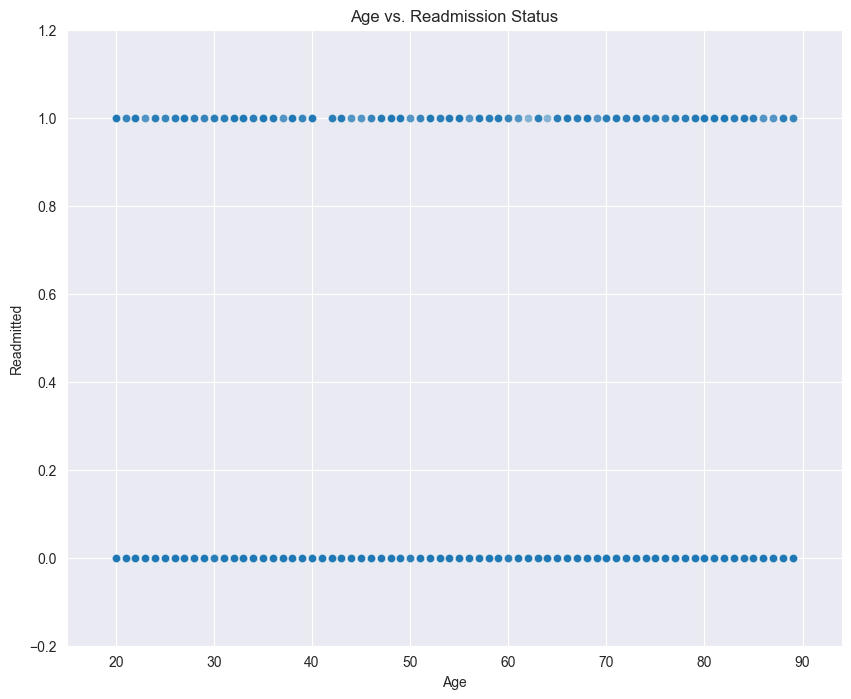

In [94]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Readmitted', data=data, alpha=0.5)

plt.xlim(data['Age'].min() - 5, data['Age'].max() + 5)
plt.ylim(-0.2, 1.2)

plt.title('Age vs. Readmission Status')
plt.xlabel('Age')
plt.ylabel('Readmitted')

plt.show()

6. Perform an outlier treatment to the variables that have outliers. Report and explain the results.

In [95]:
Q1 = data['Num_Lab_Procedures'].quantile(0.25)
Q3 = data['Num_Lab_Procedures'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Num_Lab_Procedures'] = np.where(data['Num_Lab_Procedures'] > upper_bound, upper_bound, 
                                      np.where(data['Num_Lab_Procedures'] < lower_bound, lower_bound, data['Num_Lab_Procedures']))

7. Perform missing values imputation to the variables that have missing values. Explain which method you used and why. Report the results

In [96]:
missing_values = data.isnull().sum()
print(missing_values)

Age                   0
Time_in_Hospital      0
Num_Lab_Procedures    0
Num_Medications       0
Num_Outpatient        0
Num_Inpatient         0
Num_Emergency         0
Primary_Diagnosis     0
Readmitted            0
dtype: int64


8. Perform bivariate analysis to study the strength of the correlation among your variables. Hint: use scatter plots or correlation matrix methods to explain the relationship between two variables. Report and interpret the results.

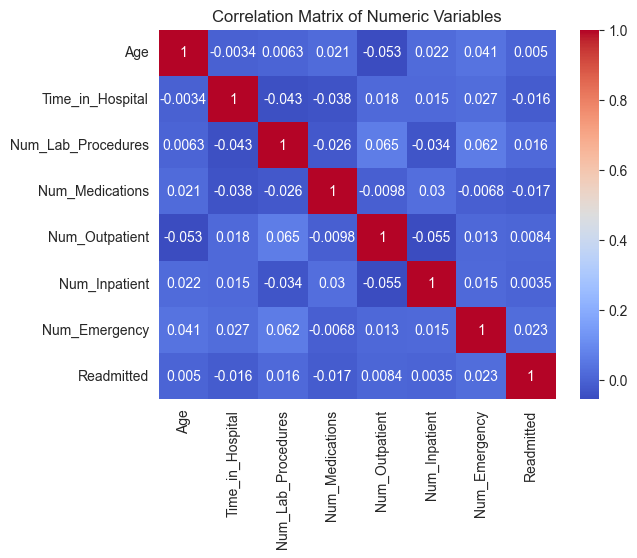

In [97]:
numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

9. Based on the results reported in the previous step, perform data transformation, as needed, to transform a relationship from nonlinear to linear. Explain your decision on the transformation method used here.

In [98]:
data['log_Num_Lab_Procedures'] = np.log1p(data['Num_Lab_Procedures'])

10. Show and explain how you would handle qualitative data in your dataset. Hint: use Dummy variables.

In [99]:
data_with_dummies = pd.get_dummies(data, columns=['Primary_Diagnosis'], drop_first=True)

11. Test for multicollinearity in the dataset using the variance_inflation_factor() function. Report the VIF values and interpret the results.

In [100]:
numeric_features = data_with_dummies.select_dtypes(include=[np.number]).dropna()

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(len(numeric_features.columns))]

print(vif_data)

                  Feature        VIF
0                     Age   7.343991
1        Time_in_Hospital   4.194755
2      Num_Lab_Procedures  13.701243
3         Num_Medications   4.133505
4          Num_Outpatient   3.412937
5           Num_Inpatient   3.106326
6           Num_Emergency   2.900602
7              Readmitted   1.414180
8  log_Num_Lab_Procedures  42.731171
